# Here we will create a model to detect who will survive the titanic tragedy based on certai features 

In [1]:
import numpy as np
import pandas as pd

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


titanic['Embarked'] = titanic['Embarked'].replace(['S','Q','C'],['1','2','3'])




In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

**Changing the value of male and female into numbers or one hot encoding**

In [6]:
from sklearn.preprocessing import LabelEncoder
le_Sex = LabelEncoder()
titanic['Sex_n'] = le_Sex.fit_transform(titanic['Sex'])

# Seeking out the correlation between label and features

In [7]:
titanic_matrix = titanic.corr()
titanic_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Sex_n      -0.543351
Name: Survived, dtype: float64

# Data Visualization

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Sex_n'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

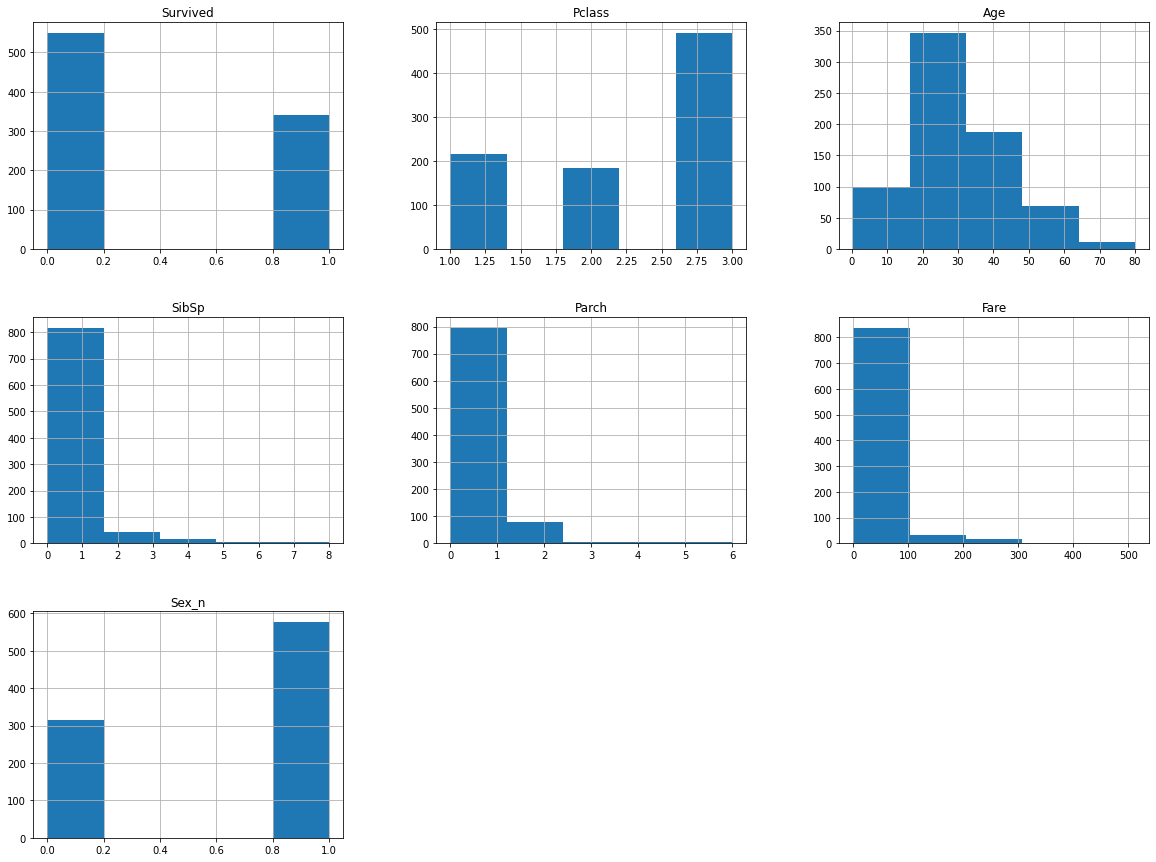

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=5,figsize=(20,15))

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Sex_n', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Sex_n', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
  

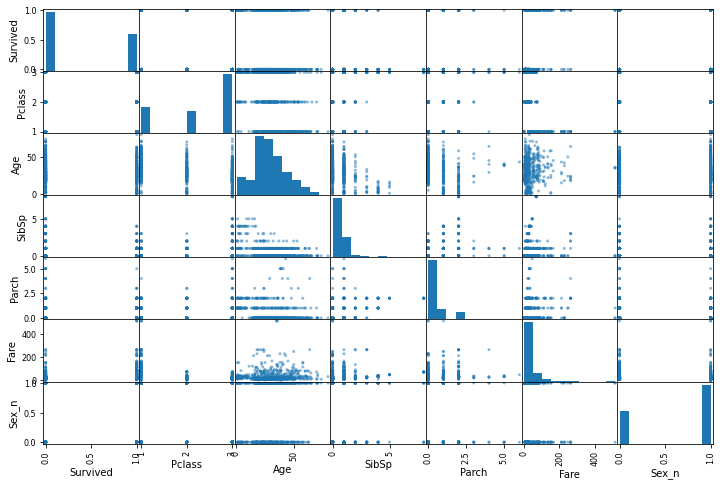

In [9]:
import pandas as pd
from pandas.plotting import scatter_matrix
scatter_matrix(titanic,figsize=(12,8))

In [10]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [11]:
titanic['Pclass'].median()

3.0

**creating a no_cabin column for the database and filling the NA Cabin with 0 and NA Embarked with S**

In [12]:
values = {'Cabin': '0', 'Embarked': 'S'}
titanic.fillna(value=values, inplace=True)
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic['no_cabin'] = 0
titanic['no_cabin'][titanic['Cabin'] == '0'] = 1
titanic.head()

<ipython-input-12-17a24b56b1b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['no_cabin'][titanic['Cabin'] == '0'] = 1


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_n,no_cabin
0,0,3,male,22.0,1,0,7.2500,0,S,1,1
1,1,1,female,38.0,1,0,71.2833,C,C,0,0
2,1,3,female,26.0,0,0,7.9250,0,S,0,1
3,1,1,female,35.0,1,0,53.1000,C,S,0,0
4,0,3,male,35.0,0,0,8.0500,0,S,1,1


**creating a seperate column for children**


In [13]:
titanic['Children'] = 0
titanic['Children'][titanic['Age'] <=12] = 1

<ipython-input-13-54d1fe067f3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Children'][titanic['Age'] <=12] = 1


**filling the values of age seperately for male and female with their mean values**


In [14]:
male = titanic['Sex'] == 'male'
female = titanic['Sex'] == 'female'
titanic.loc[male, 'Age'] = titanic.loc[male, 'Age'].fillna(titanic.loc[male, 'Age'].mean())
titanic.loc[female, 'Age'] = titanic.loc[female, 'Age'].fillna(titanic.loc[female, 'Age'].mean())
del titanic['Cabin']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,no_cabin,Children
0,0,3,male,22.0,1,0,7.2500,S,1,1,0
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,0
4,0,3,male,35.0,0,0,8.0500,S,1,1,0


In [15]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,no_cabin,Children
0,0,3,male,22.0,1,0,7.2500,S,1,1,0
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,0
4,0,3,male,35.0,0,0,8.0500,S,1,1,0


**Doing One-Hot Encoding for the Pclass and Embarked columns**

In [16]:
titanic = pd.get_dummies(data = titanic,columns=['Pclass' , 'Embarked'])
titanic

,Survived,Sex,Age,SibSp,Parch,Fare,Sex_n,no_cabin,Children,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,male,22.000000,1,0,7.2500,1,1,0,0,0,1,0,0,1
1,1,female,38.000000,1,0,71.2833,0,0,0,1,0,0,1,0,0
2,1,female,26.000000,0,0,7.9250,0,1,0,0,0,1,0,0,1
3,1,female,35.000000,1,0,53.1000,0,0,0,1,0,0,0,0,1
4,0,male,35.000000,0,0,8.0500,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,1,1,0,0,1,0,0,0,1
887,1,female,19.000000,0,0,30.0000,0,0,0,1,0,0,0,0,1
888,0,female,27.915709,1,2,23.4500,0,1,0,0,0,1,0,0,1
889,1,male,26.000000,0,0,30.0000,1,0,0,1,0,0,1,0,0


In [17]:
titanic_matrix = titanic.corr()
titanic_matrix['Survived'].sort_values(ascending=False)

Survived      1.000000
Pclass_1      0.285904
Fare          0.257307
Embarked_C    0.168240
Children      0.116691
Pclass_2      0.093349
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.080453
Embarked_S   -0.149683
no_cabin     -0.316912
Pclass_3     -0.322308
Sex_n        -0.543351
Name: Survived, dtype: float64

In [18]:
del titanic['SibSp']
del titanic['Parch']
del titanic['Fare']
del titanic['Embarked_Q']
del titanic['Pclass_2']


# Creating training data

In [19]:
target = titanic['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
inputs = titanic.drop(['Survived'],axis=1)
inputs.head()

,Sex,Age,Sex_n,no_cabin,Children,Pclass_1,Pclass_3,Embarked_C,Embarked_S
0,male,22.0,1,1,0,0,1,0,1
1,female,38.0,0,0,0,1,0,1,0
2,female,26.0,0,1,0,0,1,0,1
3,female,35.0,0,0,0,1,0,0,1
4,male,35.0,1,1,0,0,1,0,1


In [21]:
inputs.drop(['Sex'],axis=1,inplace=True)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline([('std' , StandardScaler())])
my_pipeline.fit(inputs)

Pipeline(steps=[('std', StandardScaler())])

In [23]:
inputs.head()

,Age,Sex_n,no_cabin,Children,Pclass_1,Pclass_3,Embarked_C,Embarked_S
0,22.0,1,1,0,0,1,0,1
1,38.0,0,0,0,1,0,1,0
2,26.0,0,1,0,0,1,0,1
3,35.0,0,0,0,1,0,0,1
4,35.0,1,1,0,0,1,0,1


# Creating our model

In [24]:
from sklearn.ensemble import RandomForestClassifier
clt = RandomForestClassifier(max_depth = 20, max_features = 'auto', min_samples_leaf= 50, min_samples_split= 2, n_estimators= 200)
clt.fit(inputs,target)

RandomForestClassifier(max_depth=20, min_samples_leaf=50, n_estimators=200)

In [25]:
clt.score(inputs,target)

0.8035914702581369

In [26]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clt, inputs, target , cv=3)


In [27]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
jel = confusion_matrix(target,y_train_pred)
jel

array([[497,  52],
       [141, 201]], dtype=int64)

In [28]:
recall_score(target,y_train_pred)

0.5877192982456141

In [29]:
precision_score(target,y_train_pred)

0.7944664031620553

In [30]:
f1_score(target,y_train_pred)

0.6756302521008403

In [31]:
test = pd.read_csv('test.csv')

In [32]:
test.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
le_Sex = LabelEncoder()
test['Sex_n'] = le_Sex.fit_transform(test['Sex'])


In [34]:
# creating a no_cabin column for the database
values = {'Cabin': '0', 'Embarked': 'S'}
test.fillna(value=values, inplace=True)
test['Cabin'] = test['Cabin'].str[:1]
test['no_cabin'] = 0
test['no_cabin'][test['Cabin'] == '0'] = 1
test.head()


<ipython-input-34-792deb1742c9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['no_cabin'][test['Cabin'] == '0'] = 1


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_n,no_cabin
0,3,male,34.5,0,0,7.8292,0,Q,1,1
1,3,female,47.0,1,0,7.0000,0,S,0,1
2,2,male,62.0,0,0,9.6875,0,Q,1,1
3,3,male,27.0,0,0,8.6625,0,S,1,1
4,3,female,22.0,1,1,12.2875,0,S,0,1


In [35]:

# filling the values of age seperately for male and female 
male = test['Sex'] == 'male'
female = test['Sex'] == 'female'
test.loc[male, 'Age'] = test.loc[male, 'Age'].fillna(test.loc[male, 'Age'].mean())
test.loc[female, 'Age'] = test.loc[female, 'Age'].fillna(test.loc[female, 'Age'].mean())
del test['Cabin']
test.head()



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,no_cabin
0,3,male,34.5,0,0,7.8292,Q,1,1
1,3,female,47.0,1,0,7.0000,S,0,1
2,2,male,62.0,0,0,9.6875,Q,1,1
3,3,male,27.0,0,0,8.6625,S,1,1
4,3,female,22.0,1,1,12.2875,S,0,1


In [36]:

# creating a seperate column for children
test['Children'] = 0
test['Children'][titanic['Age'] <=12] = 1

<ipython-input-36-b75f09710bbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Children'][titanic['Age'] <=12] = 1


In [37]:
test = pd.get_dummies(data = test,columns=['Pclass' , 'Embarked'])
test

,Sex,Age,SibSp,Parch,Fare,Sex_n,no_cabin,Children,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,male,34.500000,0,0,7.8292,1,1,0,0,0,1,0,1,0
1,female,47.000000,1,0,7.0000,0,1,0,0,0,1,0,0,1
2,male,62.000000,0,0,9.6875,1,1,0,0,1,0,0,1,0
3,male,27.000000,0,0,8.6625,1,1,0,0,0,1,0,0,1
4,female,22.000000,1,1,12.2875,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,male,30.272732,0,0,8.0500,1,1,0,0,0,1,0,0,1
414,female,39.000000,0,0,108.9000,0,0,0,1,0,0,1,0,0
415,male,38.500000,0,0,7.2500,1,1,0,0,0,1,0,0,1
416,male,30.272732,0,0,8.0500,1,1,0,0,0,1,0,0,1


# deleting col

In [38]:
del test['Sex']
del test['SibSp']
del test['Parch']
del test['Fare']
del test['Embarked_Q']
del test['Pclass_2']



my_pipeline.fit(test)

Pipeline(steps=[('std', StandardScaler())])

In [39]:
test

,Age,Sex_n,no_cabin,Children,Pclass_1,Pclass_3,Embarked_C,Embarked_S
0,34.500000,1,1,0,0,1,0,0
1,47.000000,0,1,0,0,1,0,1
2,62.000000,1,1,0,0,0,0,0
3,27.000000,1,1,0,0,1,0,1
4,22.000000,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
413,30.272732,1,1,0,0,1,0,1
414,39.000000,0,0,0,1,0,1,0
415,38.500000,1,1,0,0,1,0,1
416,30.272732,1,1,0,0,1,0,1


In [40]:
test.isnull()

,Age,Sex_n,no_cabin,Children,Pclass_1,Pclass_3,Embarked_C,Embarked_S
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False


In [41]:
test_n = test.to_numpy()

In [42]:
jel = test_n[12].reshape(1,-1)

In [43]:
jel

array([[23.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]])

In [44]:
clt.predict(jel)

array([1], dtype=int64)

In [45]:
np.isnan(test_n.any())

False

In [46]:
np.isfinite(test_n.all())

True

In [47]:
np.any(np.isnan(test_n))

False

In [48]:
np.all(np.isfinite(test_n))


True

In [49]:
df = pd.DataFrame(test_n)

In [50]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [51]:
clean_dataset(df)

,0,1,2,3,4,5,6,7
0,34.500000,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,47.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,62.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,27.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,22.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
413,30.272732,1.0,1.0,0.0,0.0,1.0,0.0,1.0
414,39.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
415,38.500000,1.0,1.0,0.0,0.0,1.0,0.0,1.0
416,30.272732,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [52]:
df.tail(5)

,0,1,2,3,4,5,6,7
413,30.272732,1.0,1.0,0.0,0.0,1.0,0.0,1.0
414,39.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
415,38.500000,1.0,1.0,0.0,0.0,1.0,0.0,1.0
416,30.272732,1.0,1.0,0.0,0.0,1.0,0.0,1.0
417,30.272732,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [53]:
real = pd.DataFrame(df)

In [54]:
result = clt.predict(real)

In [55]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
result_d = pd.DataFrame(result)

In [57]:
result_d

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [58]:
result_d.columns = ['Survived']
result_d

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [59]:
rest = pd.read_csv('test.csv')
rest.drop(['Name','Ticket','Cabin','Parch','SibSp','Embarked'],axis=1,inplace=True)
pdi = rest['PassengerId']


In [60]:
result_d['PassengerId'] = pdi
result_d.dropna(axis=0,inplace=True )

In [61]:
column_names = ["PassengerId","Survived"]
result_d = result_d.reindex(columns = column_names)

In [62]:
result_d

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
result_d.reset_index(drop=True,inplace=True)

In [64]:
result_d

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [65]:
result_d.to_csv('titanic_result.csv',index=False)

**The model sets to get an accuracy of 0.78 for the test dataset**